Name-Khushi Patel                 
Roll no-21bce204

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/kaggle-titanic-master/titanic-solution.ipynb
/kaggle/input/titanic/kaggle-titanic-master/images/titanic-disaster.jpg
/kaggle/input/titanic/kaggle-titanic-master/input/train.csv
/kaggle/input/titanic/kaggle-titanic-master/input/test.csv
/kaggle/input/titanic/kaggle-titanic-master/input/gender_submission.csv
/kaggle/input/titanic/kaggle-titanic-master/kaggle-titanic-master/titanic-solution.ipynb
/kaggle/input/titanic/kaggle-titanic-master/kaggle-titanic-master/images/titanic-disaster.jpg
/kaggle/input/titanic/kaggle-titanic-master/kaggle-titanic-master/input/train.csv
/kaggle/input/titanic/kaggle-titanic-master/kaggle-titanic-master/input/test.csv
/kaggle/input/titanic/kaggle-titanic-master/kaggle-titanic-master/input/gender_submission.csv


# import

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


# load data

In [4]:
tr=pd.read_csv("/kaggle/input/titanic/kaggle-titanic-master/input/train.csv" )
te=pd.read_csv("/kaggle/input/titanic/kaggle-titanic-master/input/test.csv")
gen=pd.read_csv('/kaggle/input/titanic/kaggle-titanic-master/input/gender_submission.csv')

print(tr.head())
tr.info()
te.info()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

# calculate missing value

In [5]:
percent_missing = tr.isnull().sum() * 100 / len(tr)
percent_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# percent survival

In [6]:
print(tr.groupby("Survived").size())
survived_counts = tr.groupby("Survived").size()

# Calculate the total number of passengers
total_passengers = survived_counts.sum()

# Calculate the percentage of survived
percentage_survived = (survived_counts[1] / total_passengers) * 100

print("Survived counts:")
print(survived_counts)
print("\nPercentage of passengers survived: {:.2f}%".format(percentage_survived))

Survived
0    549
1    342
dtype: int64
Survived counts:
Survived
0    549
1    342
dtype: int64

Percentage of passengers survived: 38.38%


Survived counts:
Survived
0    549
1    342
dtype: int64

Percentage of passengers survived: 38.38%


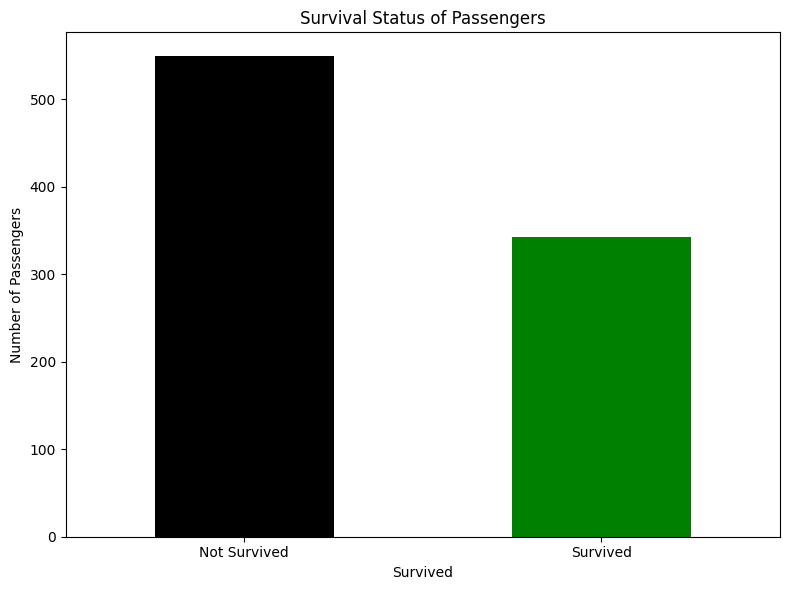

In [7]:
import pandas as pd
import matplotlib.pyplot as plt



# Group by 'Survived' column and calculate the counts
survived_counts = tr.groupby("Survived").size()

# Calculate the total number of passengers
total_passengers = survived_counts.sum()

# Calculate the percentage of survived passengers
percentage_survived = (survived_counts[1] / total_passengers) * 100

# Print the survived counts
print("Survived counts:")
print(survived_counts)

# Print the percentage of passengers survived
print("\nPercentage of passengers survived: {:.2f}%".format(percentage_survived))

# Plotting the data
plt.figure(figsize=(8, 6))
survived_counts.plot(kind='bar', color=['black', 'green'])
plt.title('Survival Status of Passengers')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'], rotation=0)
plt.tight_layout()

# Show plot
plt.show()



In [8]:
survived_s_counts = tr.groupby(["Survived", "Sex"]).size()

# Calculate the total number of passengers
total_passengers = survived_s_counts.sum()

# Calculate the percentage of male and female survival
percentage_male_survived = (survived_s_counts[1, 'male'] / total_passengers) * 100
percentage_female_survived = (survived_s_counts[1, 'female'] / total_passengers) * 100

print("Survival counts by Sex:")
print(survived_s_counts)

print("\nPercentage of male passengers survived: {:.2f}%".format(percentage_male_survived))
print("Percentage of female passengers survived: {:.2f}%".format(percentage_female_survived))

Survival counts by Sex:
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

Percentage of male passengers survived: 12.23%
Percentage of female passengers survived: 26.15%


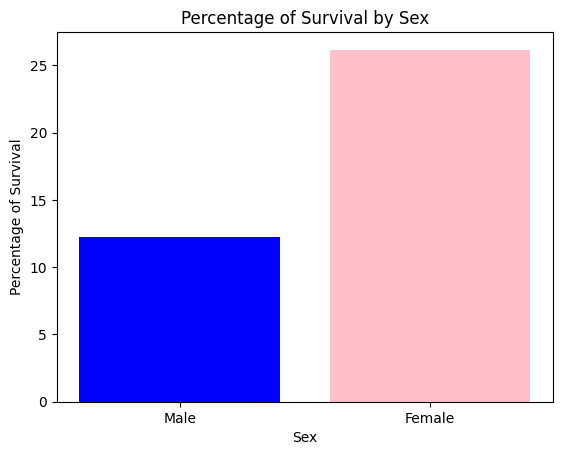

In [9]:
labels = ['Male', 'Female']
percentages = [percentage_male_survived, percentage_female_survived]

plt.bar(labels, percentages, color=['blue', 'pink'])
plt.xlabel('Sex')
plt.ylabel('Percentage of Survival')
plt.title('Percentage of Survival by Sex')
plt.show()

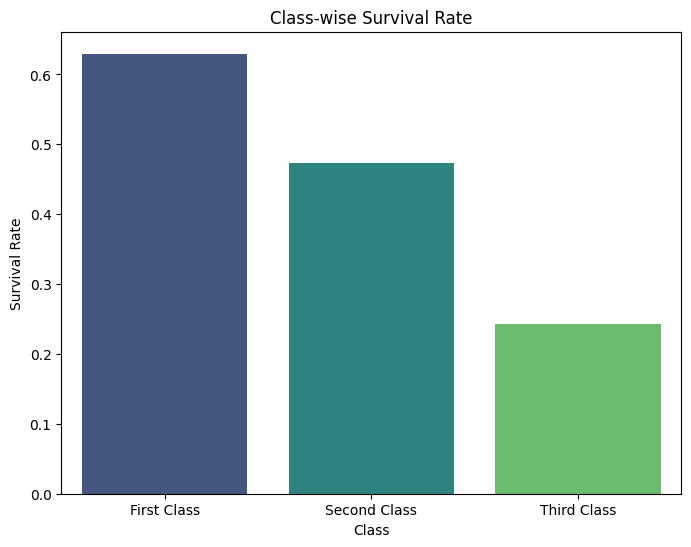

In [35]:


# Assuming 'train_data' is the DataFrame containing the Titanic dataset
# Replace this with your actual DataFrame

# Group data by class (Pclass) and calculate mean survival rate
class_survival_rate = tr.groupby('Pclass')['Survived'].mean().reset_index()

# Plot class-wise survival rate
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=class_survival_rate, palette='viridis')
plt.title('Class-wise Survival Rate')
plt.xlabel('Class')
plt.ylabel('Survival Rate')

# Define class labels
class_labels = ['First Class', 'Second Class', 'Third Class']

# Set x-axis tick positions and labels
plt.xticks(range(len(class_labels)), class_labels)

plt.show()



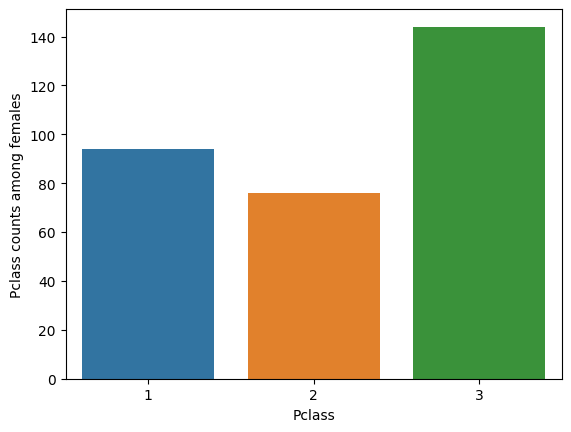

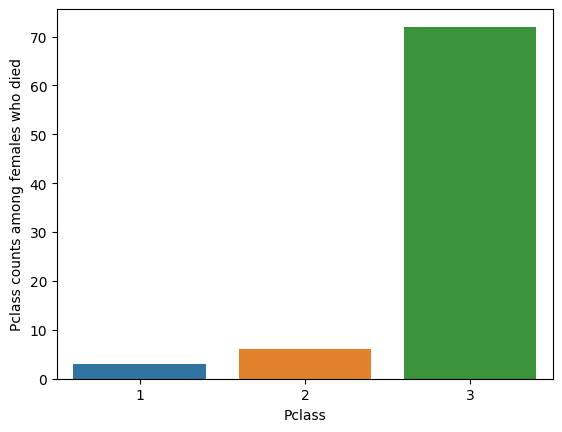

In [10]:
#Pclass might have played some role in not survival as priority among same gender type may be based on that
#So let us examine Pclass among the females who did not survive.

#First overall Pclass distribution among females
ax=sns.countplot(x="Pclass", data=tr.loc[ (tr.loc[:,"Sex"]=='female'), :])
ax.set_ylabel('Pclass counts among females')

#Now Pclass among females who died
plt.figure()

ax=sns.countplot(x="Pclass", data=tr.loc[ (tr.loc[:,"Sex"]=='female') & (tr.loc[:,"Survived"]==0), :])
ax.set_ylabel('Pclass counts among females who died')


counts=tr.loc[ tr.loc[:,"Sex"]=='female' ,["Sex", "Pclass"]].groupby("Pclass")["Sex"].count()

total_n_females_Pclasswise=counts.tolist()

In [11]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    Note that the newer :func:`histplot` function offers more functionality, although
    its default behavior is somewhat different.
    
    .. note::
        This function always treats one of the variables as categorical and
        draws data at ordinal positions (0, 1, ... n) on the relevant axis,
        even when the data has a numeric or date type.
    
    See the :ref:`tutorial <categorical_tutorial>` for more information.    
    


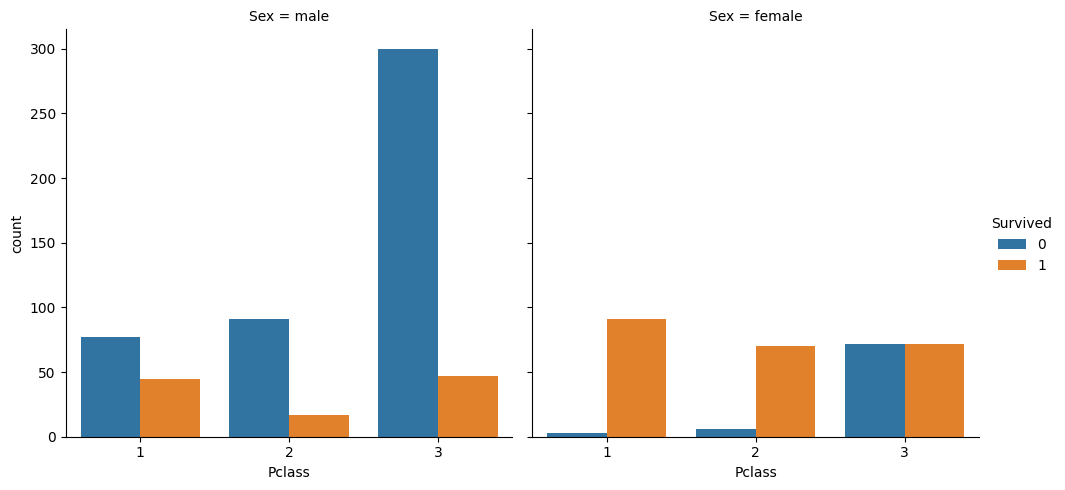

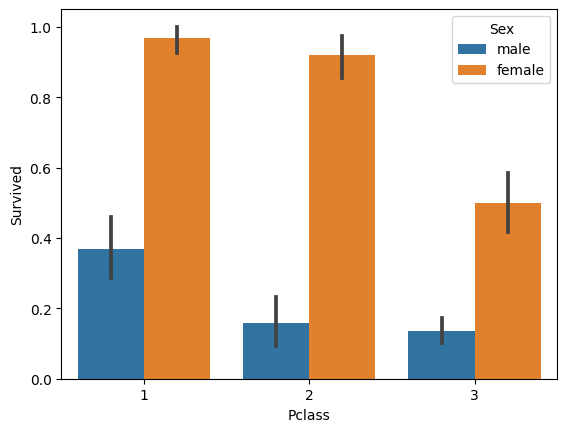

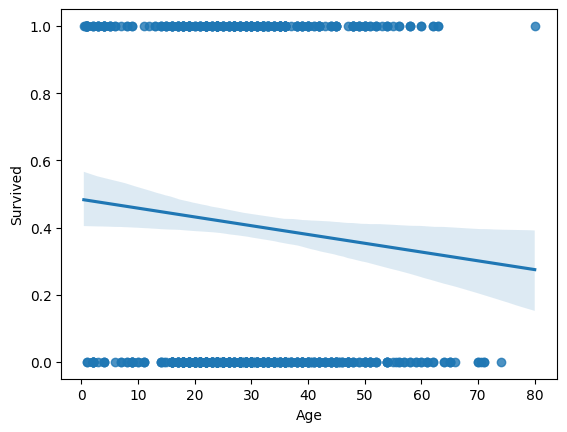

In [12]:


# Count plot for Pclass-wise  Survival
sns.catplot(x="Pclass", hue="Survived", col="Sex", kind="count", data=tr)
plt.show()

# Bar plot of Pclass-wise and Gender-wise Survival
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=tr)
plt.show()

# Regression plot for Age and Survival
sns.regplot(x="Age", y="Survived", data=tr)
plt.show()


In [13]:



data = {
    'Name': ['Mr. John Doe', 'Mrs. Jane Smith', 'Miss. Alice Johnson', 'Master. James Brown', 'Dr. David Lee'],
    'Age': [30, 25, 22, None, 40]
}
df = pd.DataFrame(data)

# Extract Salutation from Name
df['Salutation'] = df['Name'].str.extract(r'([A-Za-z]+)\.')

# Mapping similar Salutations
salutation_mapping = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Dr': 'Dr',
   
}

# Merge similar Salutations
df['Salutation'] = df['Salutation'].map(salutation_mapping)

# Find median age Salutation-wise
median_age = df.groupby('Salutation')['Age'].median()

# Impute missing values in Age Salutation-wise fills missing values with median value
df['Age'] = df.groupby('Salutation')['Age'].transform(lambda x: x.fillna(x.median()))

# Display the DataFrame
print("Modified DataFrame:")
print(df)

# Display median age Salutation-wise
print("\nMedian Age Salutation-wise:")
print(median_age)


Modified DataFrame:
                  Name   Age Salutation
0         Mr. John Doe  30.0         Mr
1      Mrs. Jane Smith  25.0        Mrs
2  Miss. Alice Johnson  22.0       Miss
3  Master. James Brown   NaN     Master
4        Dr. David Lee  40.0         Dr

Median Age Salutation-wise:
Salutation
Dr        40.0
Master     NaN
Miss      22.0
Mr        30.0
Mrs       25.0
Name: Age, dtype: float64


/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


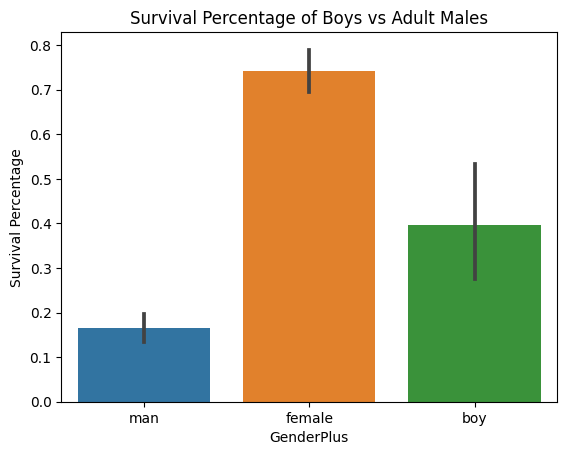

In [36]:


# Define or load train_data and test_data DataFrames

# Assuming train_data and test_data are already loaded or defined

# Then you can proceed with the code
tr['GenderPlus'] = np.where((tr['Sex'] == 'female'), 'female', np.where((tr['Age'] < 18), 'boy', 'man'))
te['GenderPlus'] = np.where((te['Sex'] == 'female'), 'female', np.where((te['Age'] < 18), 'boy', 'man'))

# Visualize survival percentage of boys vs adult males
sns.barplot(x='GenderPlus', y='Survived', data=tr)
plt.title('Survival Percentage of Boys vs Adult Males')
plt.xlabel('GenderPlus')
plt.ylabel('Survival Percentage')
plt.show()


In [15]:
# Define or load train_data DataFrame (placeholder for demonstration)
train_data = pd.DataFrame({
    'SibSp': [1, 0, 1, 0, 1],
    'Parch': [2, 1, 0, 2, 0]
})

# Create Family_Size attribute
train_data['Family_Size'] = train_data['SibSp'] + train_data['Parch'] + 1

# Display the DataFrame with the new Family_Size feature
print(train_data)


   SibSp  Parch  Family_Size
0      1      2            4
1      0      1            2
2      1      0            2
3      0      2            3
4      1      0            2


In [16]:
#Construct Family Size, we may use it.
tr["Family_Size"]=tr["SibSp"]+tr["Parch"]+1
te["Family_Size"]=te["SibSp"]+te["Parch"]+1

In [37]:
from sklearn.preprocessing import LabelEncoder

#Construct FamilySurvivalRate
#The hypothesis is that if somebody from a family of a passenger under focus is survived then the chances of that passenger
#survived is also more

#First combine train and test
data=pd.concat([tr,te], axis=0, ignore_index=True)

#Add surname as it can help identify family

data["Surname"]=data.loc[:,"Name"].str.split(pat=",").str[0]
#print(type(data.loc[:,"Name"].str.split(pat=",")))
#print(data.loc[:,"Name"].str.split(pat=",").str[0])

#Add Family_Survival_Rate

data["FamilySurvivalRate"]=0.9

for grpid, grpdf in data.groupby("Surname"):
    if len(grpdf) > 1:
        for ind, row in grpdf.iterrows():
            smax=grpdf.drop(ind).loc[:, "Survived"].max()
            smin=grpdf.drop(ind).loc[:, "Survived"].min()
            pid=row["PassengerId"]
            
            if smax == 1:
                data.loc[ data.loc[:,"PassengerId"]==pid, "FamilySurvivalRate"]=1
            elif smin==0:
                data.loc[ data.loc[:,"PassengerId"]==pid, "FamilySurvivalRate"]=0
                #Same ticket is also an indication of the same family
for grpid1, grpdf1 in data.groupby("Ticket"):
    if len(grpdf1) > 1:
        for ind, row in grpdf1.iterrows():
            smax=grpdf1.drop(ind).loc[:, "Survived"].max()
            smin=grpdf1.drop(ind).loc[:, "Survived"].min()
            pid=row["PassengerId"]
            
            if smax == 1:
                data.loc[ data.loc[:,"PassengerId"]==pid, "FamilySurvivalRate"]=1
            elif smin==0:
                data.loc[ data.loc[:,"PassengerId"]==pid, "FamilySurvivalRate"]=0
#drop Salutation and Surname as they are no longer required
#data.drop(columns=["Salutation", "Surname"], inplace=True)          

#split back to trdf and tsdf

tr=data.loc[0:890,:].copy()
ts=data.loc[891:,:].copy()

#label encoding of GenderPlus and Sex
lec=LabelEncoder()
lec.fit(tr.loc[:,"GenderPlus"])
tr.loc[:,"GenderPlus"]=lec.transform(tr.loc[:,"GenderPlus"])
ts.loc[:,"GenderPlus"]=lec.transform(te.loc[:,"GenderPlus"])

lec=LabelEncoder()
lec.fit(tr.loc[:,"Sex"])
tr.loc[:,"Sex"]=lec.transform(tr.loc[:,"Sex"])
ts.loc[:,"Sex"]=lec.transform(te.loc[:,"Sex"])


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define or load train_data and test_data DataFrames

# Assuming train_data and test_data are already loaded or defined

# Then you can proceed with the code
train_data['GenderPlus'] = np.where((train_data['Sex'] == 'female'), 'female', np.where((train_data['Age'] < 18), 'boy', 'male'))
test_data['GenderPlus'] = np.where((test_data['Sex'] == 'female'), 'female', np.where((test_data['Age'] < 18), 'boy', 'male'))

# Visualize survival percentage of boys vs adult males
sns.barplot(x='GenderPlus', y='Survived', data=train_data)
plt.title('Survival Percentage of Boys vs Adult Males')
plt.xlabel('GenderPlus')
plt.ylabel('Survival Percentage')
plt.show()
Construct a new attribute, let us name it 'GenderPlus' with possible values female, boy and male. This is because we suspect that boys might had better chance of survival than adult males.

In [20]:
# Impute missing value in Fare column with median
median_fare = data['Fare'].median()
data['Fare'].fillna(median_fare, inplace=True)



# Drop the Fare_Bins column if it's no longer needed
# data.drop(columns=['Fare_Bins'], inplace=True)

# Split back to train and test datasets
tr = data.loc[0:890].copy()
te = data.loc[891:].copy()
